# PROYEK REGRESI : Asuransi Kesehatan


## Import Library

Tahapan pertama adalah mengimport libraries yang dibutuhkan dalam proyek Regresi untuk prediksi asuransi kesehatan

In [ ]:
import pandas as pd
import numpy as np
import zipfile
import os
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

## Data Loading

Tahapan ini memuat dataset asuransi kesehatan. Di sini kita akan melakukan pengecekan awal dataset, dimensi dataset, dan memastikan tidak ada error dalam proses pembacaan data. Tujuannya adalah untuk memahami struktur awal data yang akan di analisis lebih lanjut.

In [ ]:
# Membuat folder dataset-insurance
os.makedirs("dataset-insurance", exist_ok=True)

# Ekstrak ZIP ke folder dataset-insurance/
with zipfile.ZipFile("/content/Health Insurance Dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset-insurance")

# Menampilkan isi folder hasil ekstraksi
os.listdir("dataset-insurance")

['insurance.csv']

In [ ]:
# read dataset
dataset = pd.read_csv("/content/dataset-insurance/insurance.csv")
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## EDA

Tahapan ketiga yaitu, EDA (Exploratory Data Analysis) bertujuan untuk memahami distribusi dan pola dalam data. Kita akan mengeksplorasi hubungan antar fitur, outlier, dan tren yang mungkin relevan terhadap target variabel (biaya asuransi/charges). Langkah ini penting untuk menemukan insight awal dan menentukan strategi feature engineering atau pemodelan selanjutnya.

### Informasi data

Memulai ekploratory dengan mengenal dataset terlebih dahulu,
melihat informasi dari dataset yang digunakan yaitu,
1. Memiliki total data 1338, 7 kolom yang terdiri dari 6 fitur (Age, Sex,BMI,Children,Smooker,Region) dan 1 target (Charges)
2. Dataset tidak ada missing values dapat dibuktikan semua "non-null" dan jumlah data sebanyak 1338
3. Menampilkan tipe data dari setiap kolom (Dytpe)

In [ ]:
# Check informasi dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


meskipun sudah terlihat saat melakukan check info data, untuk memperjelas kembali apakah dataset ini memiliki missing value atau tidak, dengan melakukan check seperti kode dibawah ini. Hasilnya terlihat tidak ada missing value untuk setiap kolom  

In [ ]:
# check missing value
print("Missing values: ")
dataset.isna().sum()

Missing values: 


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Selain check missing value, penting juga untuk melakukan check duplikasi dataset dan ditemukan ada 1 duplikat

In [ ]:
# Check duplikasi dataset
print("Duplikasi data: ", dataset.duplicated().sum())

Duplikasi data:  1


Mengetahui informasi statistik deskriptif dataset seperti
1. Jumlah (count),
2. Rata-rata(mean),
3. Standar deviasi(std),
4. Nilai minimial dan maksimal,
5. serta nilai 25%, 50%, 75%
dari setiap fitur dan atribut bertipe data numerik dengan hasil sebagai berikkut
informasi yang didapatkan adalah
- Umur termuda nasabah asuransi ini berumur 18 tahun dan tertua 64 tahun
- Rata-rata BMI nasabah yang terdaftar yaitu 30 kg
- Rata-rata nasabah memiliki 1 anak maksimal dan maksimal memiliki 5 anak
- Rata-rata asuransi yang dibayarkan yaitu 13270 USD dan tertinggi adalah 63770

In [ ]:
# Melihat statistik deskriptif
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Tidak hanya melihat dataset numerik saja, namun kita bisa menampilkan dataset categorikal juga dengan menambahkan kode (include='all')
infromasi yang bisa diperoleh dari hasil ini yaitu, gender yang paling banyak adalah laki-laki, kebanyakan nasabah tidak memiliki riwayat merokok, dan paling banyak berasal dari southeast

In [ ]:
# Melihat ringkasan numeririk dan kategorikal statistik deskriptif
dataset.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


**Visualisasi analisis fitur numerik**
visualisasi ini dimaksudkan untuk melihat distribusi dari fitur numerik di dapatkan informasi
1. Umur kurang dari 20 tahun merupakan frekuensi terbanyak sebagai nasabah asuransi yang terdaftar, semakin tua usia jumlahnya semakin turun  
2. indeks massa tubuh memiliki distribusi normal yang menagrtikan ebagian besar nilai berada di sekitar rata-rata (mean), dan semakin jauh dari rata-rata, semakin sedikit frekuensinya.
3. grafik children menunjukkan frekuensi nasbah yang tidak memiliki anak lebih tinggi dan yang memiliki banyak anak (5 anak) hanya sedikit saja
4. grafik membentuk distribusi right skewed yang mengartikan frekuensi biaya rendah < 20000 cenderung lebih banyak dibanding biaya yg lebih tinggi

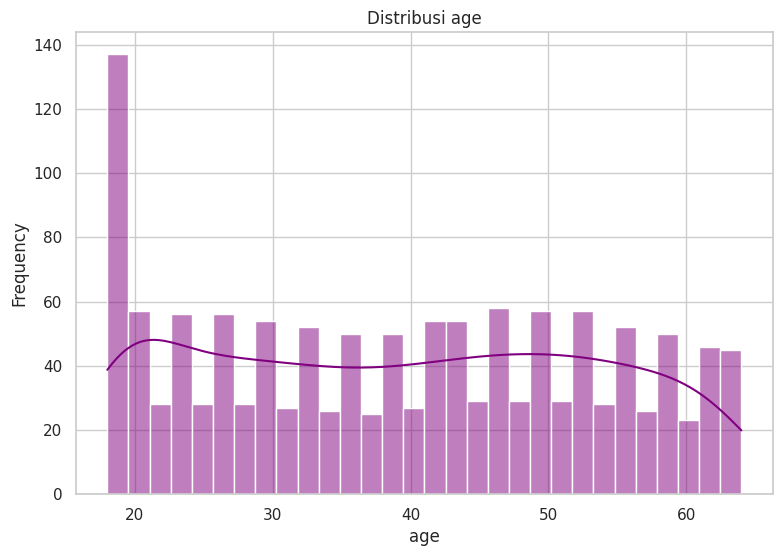

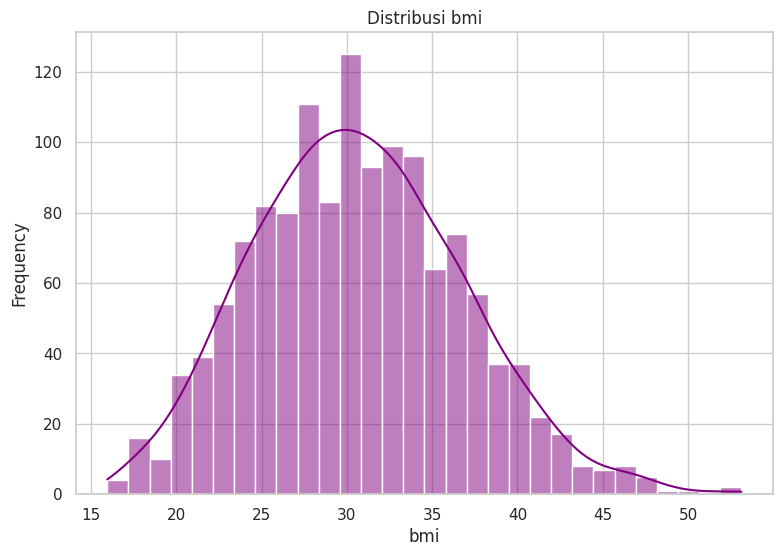

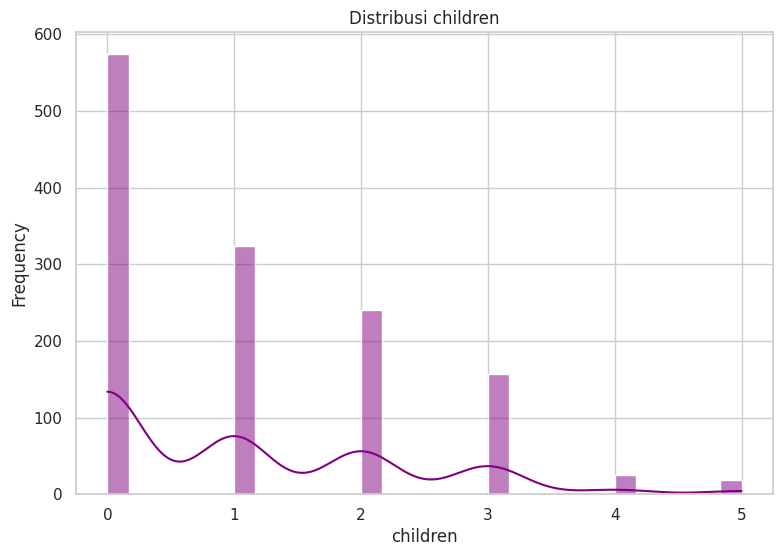

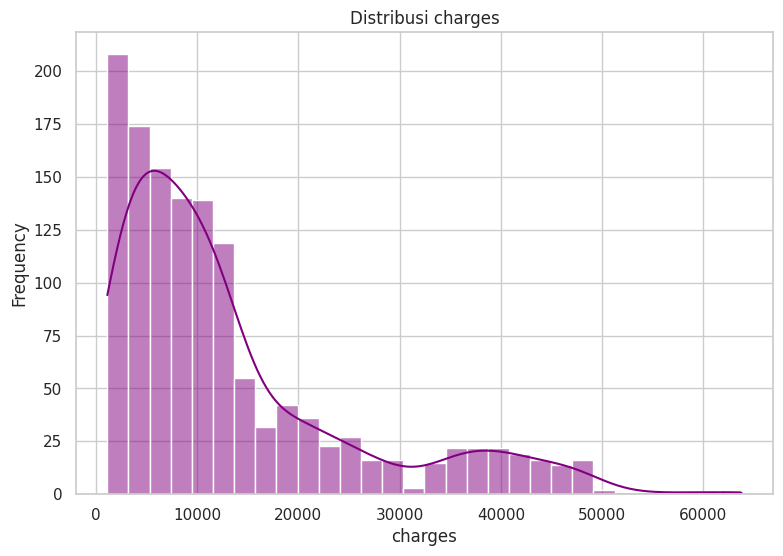

In [ ]:
numerical_features = ["age","bmi","children","charges"]

for col in numerical_features:
    sns.set(style="whitegrid")
    fig = plt.figure(figsize=(9, 6))
    sns.histplot(dataset[col], kde=True, bins=30, color='purple')
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

untuk melihat hubungan antar fitur numerik dengan charges dalam dataset menampilkan informasi
1. age vs charges : bentuk meningkat seiring bertambahnya usia, atau dapat diartikan umur lebih tua dikenakan biaya asuransi lebih tinggi dibanding dengan umur lebih muda
2. bmi vs charges : Distribusi terkumpul diantara nilai 20-40 atau rata-rata bmi adalah 30  
3. children vs charges : dapat terlihat sepertinya distribusi children kurang memiliki hubungan kuat dengan penetapan pembayaran
4. charges vs charges : distribusi skewed ke kanan yang mengartikan frekuensi dengan biaya terendah lebih banyak

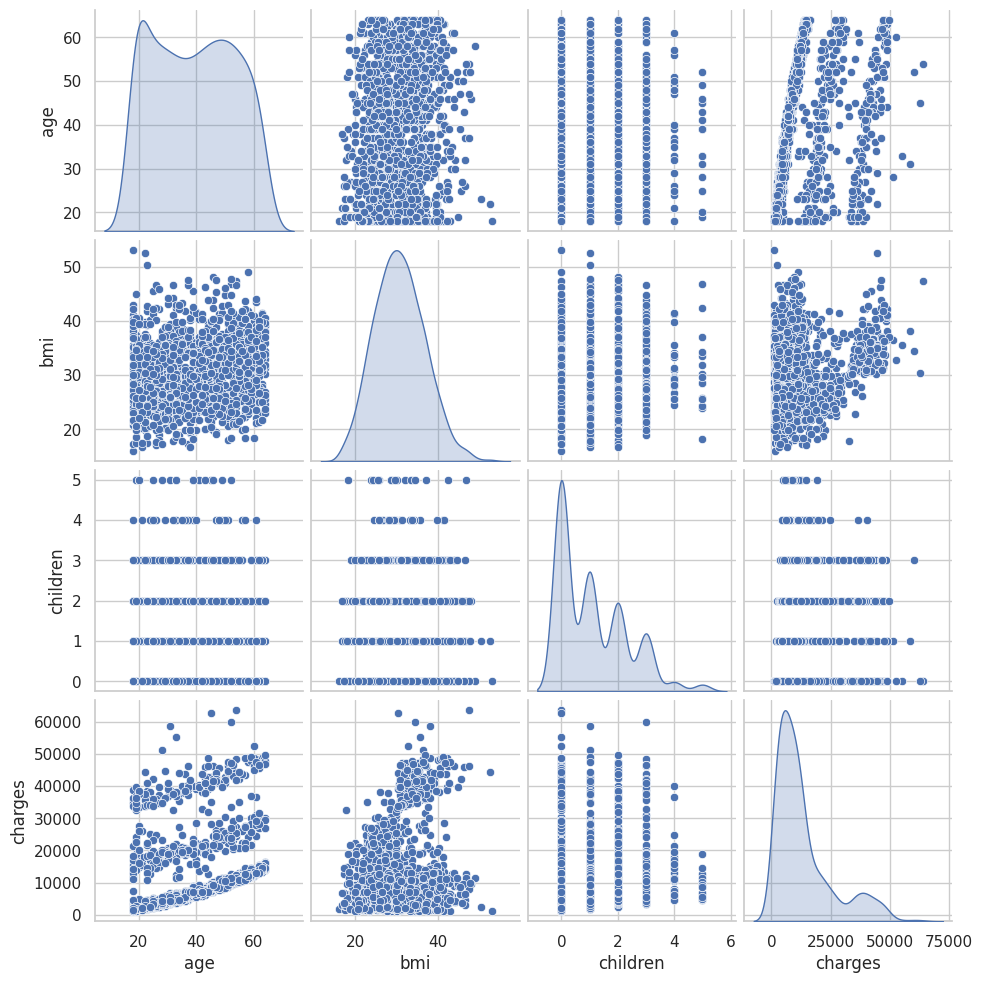

In [ ]:
# Pairplot relasi antara fitur numerik
sns.pairplot(dataset, vars=numerical_features, diag_kind='kde')
plt.show()

**Visualisasi analisis fitur kategorikal**

diatas kita sudah mengekplor banyak mengenai fitur numerik yang ada dalam dataset, selanjutnya kita akan mengekplor data categorikal, dengan memperoleh informasi sebagai berikut
1. Jumlah laki-laki yang terdaftar pada asuransi ini lebih banyak (680) dibanding perempuan (670), namun perbedaan ini tidak jauh
2. lebih dari 1000 nasabah asuransi tidak banyak yang memiliki riwayat perokok
3. berdasarkan wilayahnya nasabah dari southeast berjumlah lebih banyak dibanding dari tiga wilayah lainnya

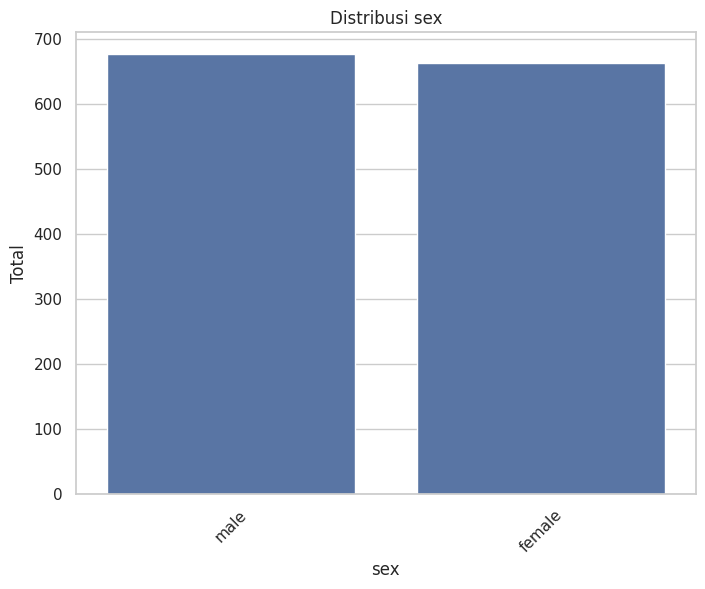

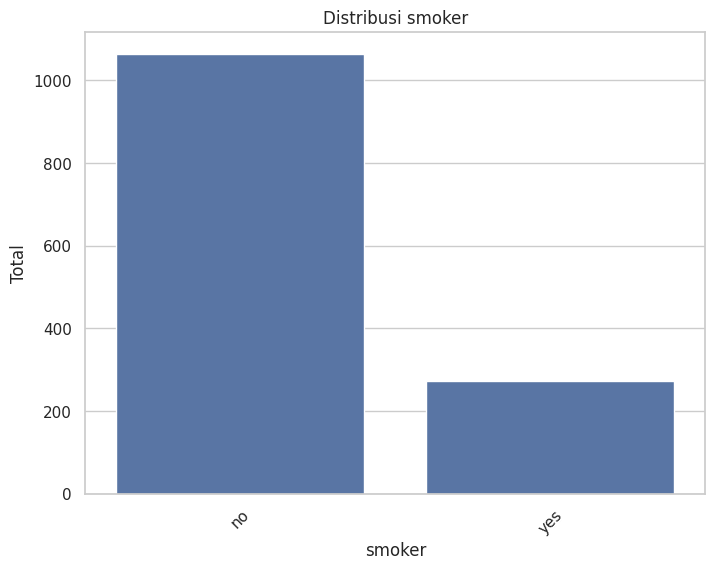

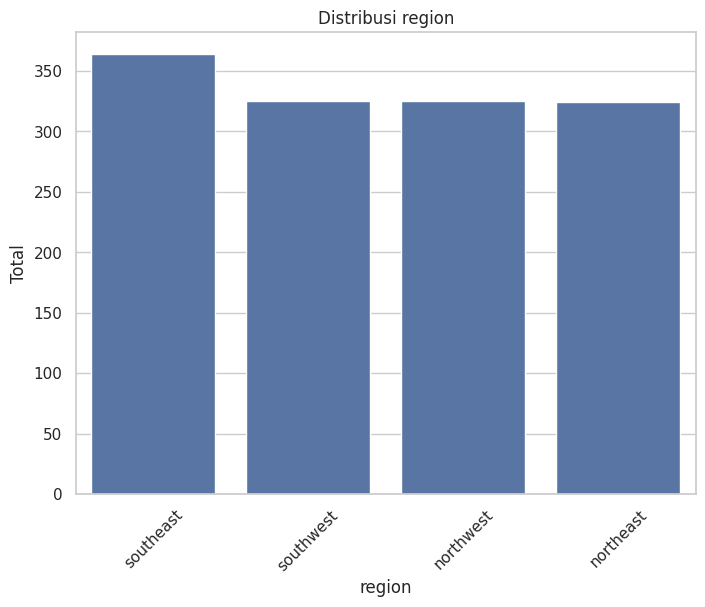

In [ ]:
categorical_features = ["sex","smoker","region"]

for col in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=dataset, order=dataset[col].value_counts().index)
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Total")
    plt.xticks(rotation=45)
    plt.show()

**Analisis Multivariate**
Mirip seperti melihat korelasi menggunakan pairplot saya menampilkan korelasi fitur numerik menggunakan heatmap untuk melihat lebih jelas hubungan yang terjadi, informasi yang diperoleh
- Korelasi terkuat fitur dengan target yaitu antara age dan charges bernilai 0.3
- sedangkan korelasi lain seperti bmi dan children kurang memiliki hubungan kuat dengan charges namun kedua fitur ini bis amenjadi tambahan untuk melakukan fitur engineering  

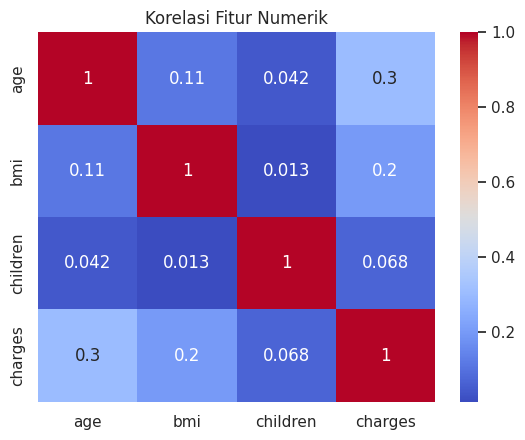

In [ ]:
# Korelasi fitur numerik
matriks_korelasi = dataset[numerical_features].corr()
sns.heatmap(matriks_korelasi, annot=True, cmap='coolwarm')
plt.title("Korelasi Fitur Numerik")
plt.show()

**hubungan data kategori dan charges**
Melihat hubungan antara data kategori dengan target charges, memperoleh informasi
- Antara sex dan charges saja kurang memiliki korelasi kuat
- Antara perokok aktif dengan charges mengartikan bahwa, perokok aktif akan membayar asuransi lebih tinggi
- Antara wilayah dengan charges kurang memiliki korelasi kuat    

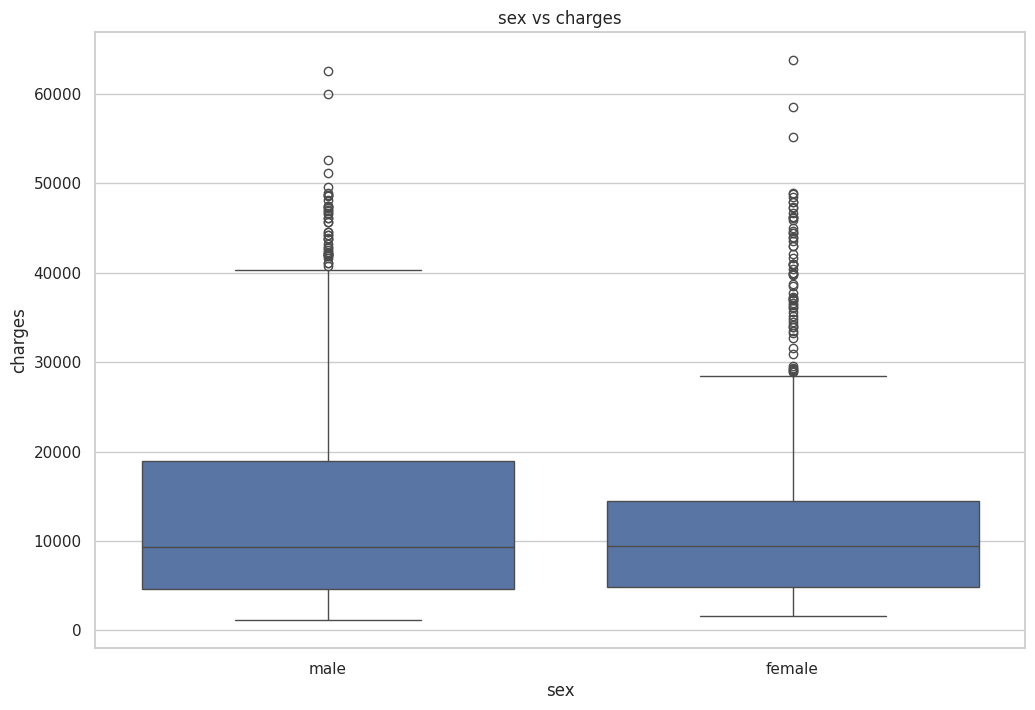

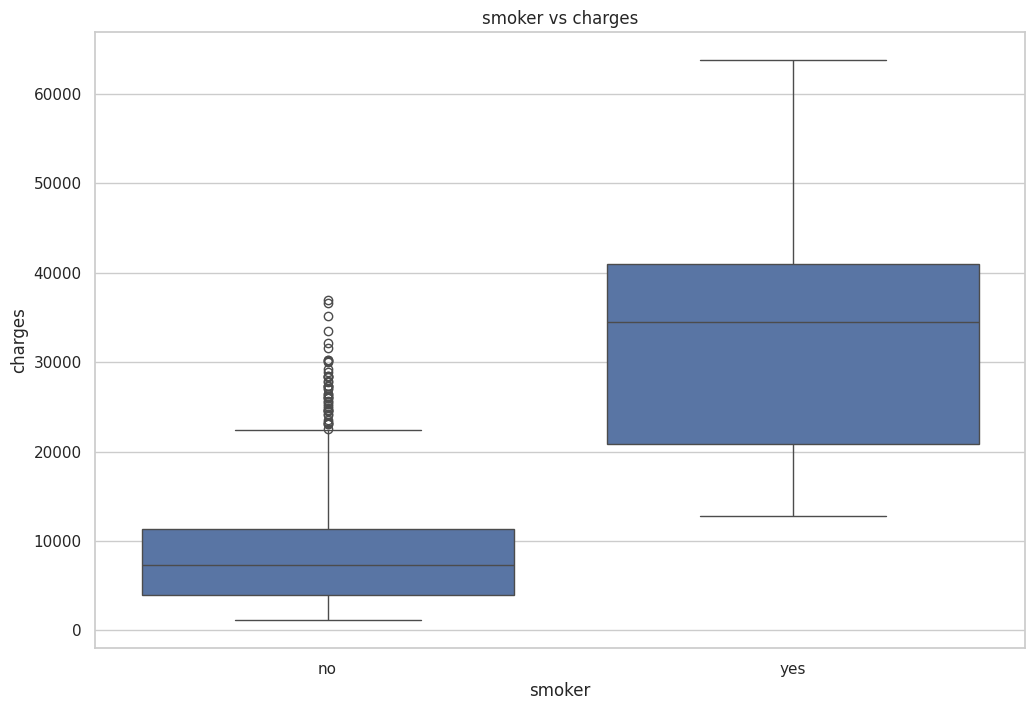

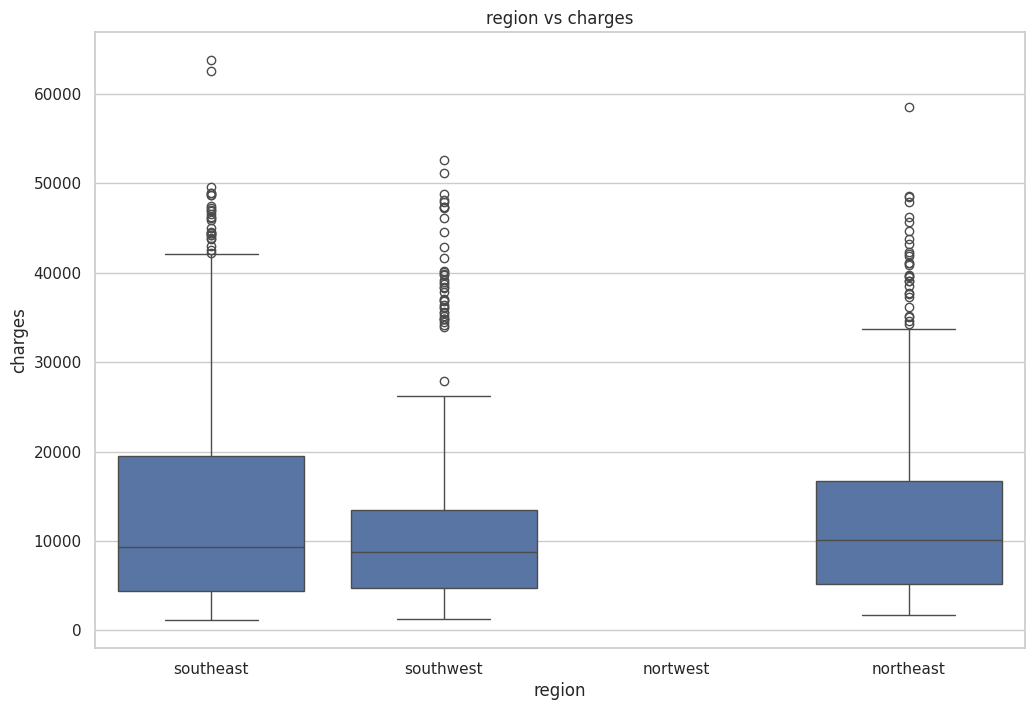

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=dataset, x='sex', y='charges', order=['male','female'])
plt.title("sex vs charges")
plt.xlabel("sex")
plt.ylabel("charges")
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(data=dataset, x='smoker', y='charges', order=['no','yes'])
plt.title("smoker vs charges")
plt.xlabel("smoker")
plt.ylabel("charges")
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(data=dataset, x='region', y='charges', order=['southeast', 'southwest','nortwest','northeast'])
plt.title("region vs charges")
plt.xlabel("region")
plt.ylabel("charges")
plt.show()

**hubungan fitur numerik dan charges**

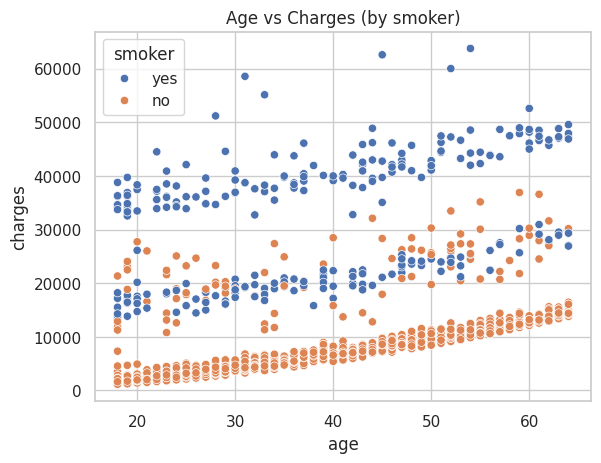

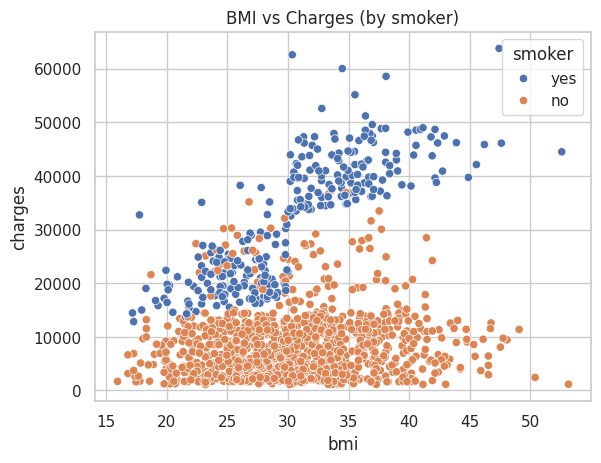

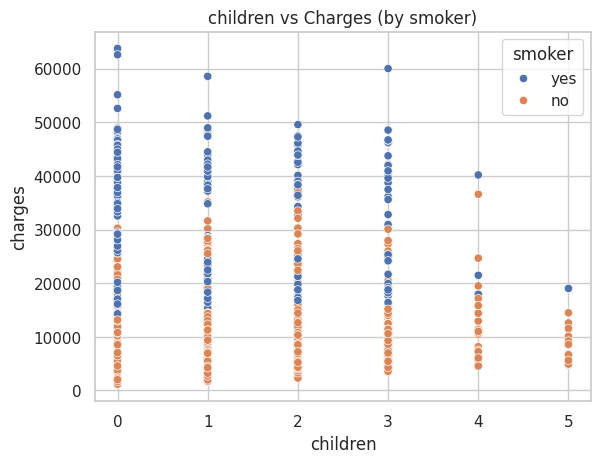

In [ ]:
sns.scatterplot(x='age', y='charges', hue='smoker', data=dataset)
plt.title("Age vs Charges (by smoker)")
plt.show()

sns.scatterplot(x='bmi', y='charges', hue='smoker', data=dataset)
plt.title("BMI vs Charges (by smoker)")
plt.show()

sns.scatterplot(x='children', y='charges', hue='smoker', data=dataset)
plt.title("children vs Charges (by smoker)")
plt.show()

**melihat outlier pada data numerik**
outlier ditemukan pada fitu bmi dan label charges, namun ini masih bisa masuk akal sehingga tidak perlu dihilangkan akan tetapi dapat ditangani menggunakan IQR

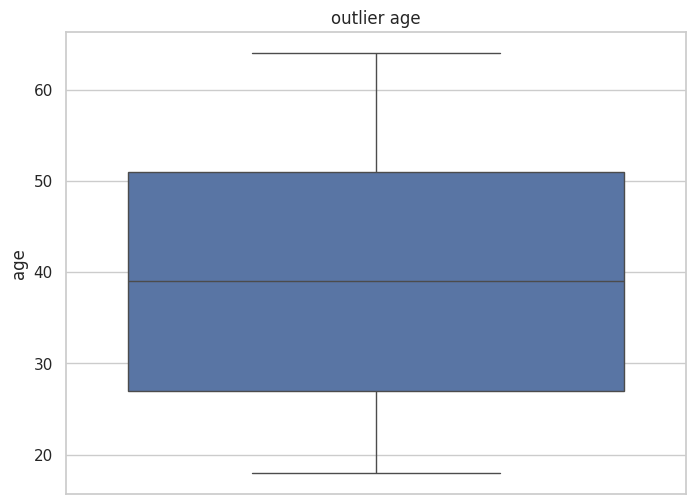

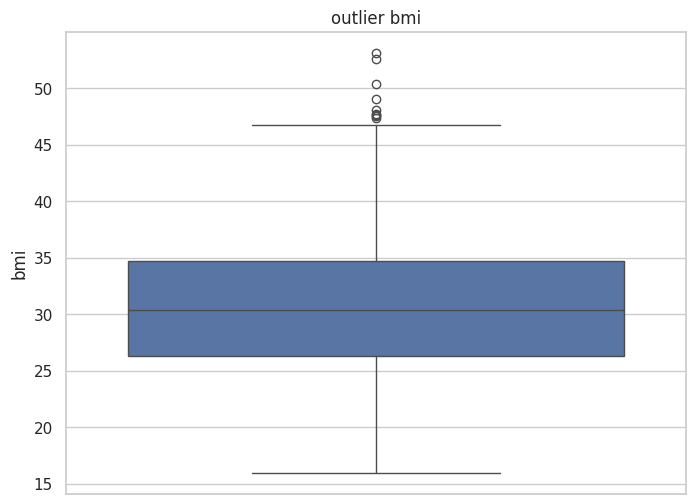

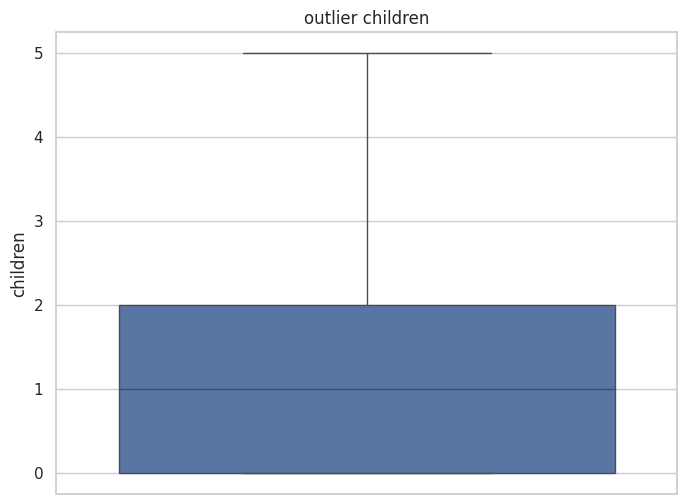

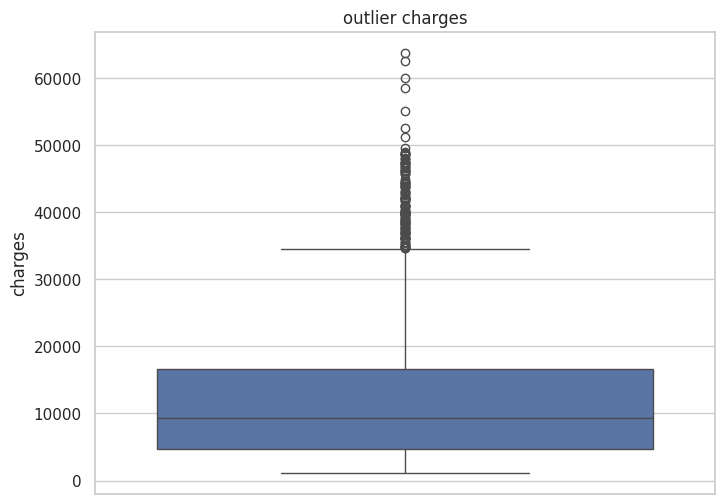

In [ ]:
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=dataset, y=col)
    plt.title(f"outlier {col}")
    plt.ylabel(col)
    plt.show()

**korelasi data kategori**
- hubungan kuat terjadi pada gender baik perempuan maupun laki-laki bukan perokok
- laki-laki perokok sekitar 159 orang lebih sedikit dibanding dengan bukan perokok

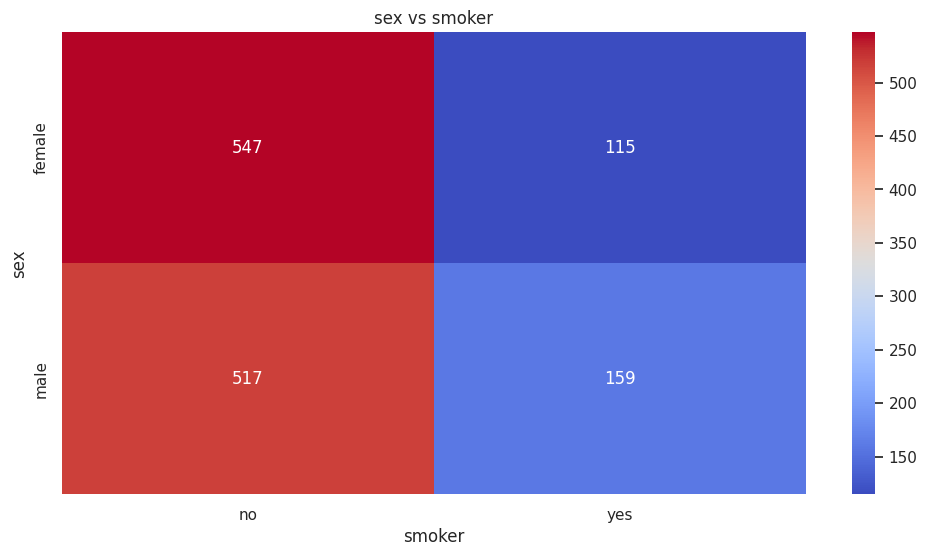

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(pd.crosstab(dataset['sex'], dataset['smoker']), annot=True, cmap='coolwarm', fmt="d")
plt.title("sex vs smoker")
plt.show()

## Data Preparation

Sebelum data digunakan untuk pelatihan model, kita harus mempersiapkannya agar sesuai. Proses ini meliputi: penanganan duplikasi data, encoding variabel kategorikal, standarisasi data numerik, serta pemisahan data menjadi train dan test set. Tahapan ini penting agar model bisa belajar dari data dengan optimal.

pada tahapan data preparation ini saya akan coppy dataset asli dengan nama df_raw hal ini dilakukan untuk melindungi data asli, supaya bisa dibandingkan antara data asli dengan hasil preparation nanti

In [ ]:
# menyimpan salinan dataset mentah
df_raw = dataset.copy()

**karena terlihat ada 1 duplikasi maka langkah pertama adalah hapus duplikasi data** dan lihat perubahannya duplikasi sudah hilang dengan menampilkan jumlah duplikasi data: 0

In [ ]:
df_raw.drop_duplicates(inplace=True)
# check data apakah masih ada duplikasi?
print("Duplikasi data: ", df_raw.duplicated().sum())

Duplikasi data:  0


seperti yang kita tahu, dataset ini memiliki fitur kategorikal, kita perlu melakukan on hot encoding untuk mengubahnya menjadi numerikal supaya dapat dilakukan modeling oleh sistem nanti
**melakukan one hot encoding pada data kategorikal (sex,smoker, region)**

In [ ]:
categorical_features = ["sex","smoker","region"]
df_raw = pd.get_dummies(df_raw, columns=categorical_features, drop_first=True).astype(int)
df_raw

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30,3,10600,1,0,1,0,0
1334,18,31,0,2205,0,0,0,0,0
1335,18,36,0,1629,0,0,0,1,0
1336,21,25,0,2007,0,0,0,0,1


Hasil EDA kita telah temukan ada fitur dan target yang memiliki outlier oleh sebabitu perlu adanya **penanganan outlier** dengan menggunakan IQR

In [ ]:
for col in numerical_features:
    Q1 = df_raw[col].quantile(0.25)
    Q3 = df_raw[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # mengganti nilai yang di bawah lower_bound menjadi lower_bound
    # dan nilai di atas upper_bound menjadi upper_bound
    df_raw[col] = np.where(df_raw[col] < lower_bound, lower_bound,
                    np.where(df_raw[col] > upper_bound, upper_bound, df_raw[col]))

Dari hasil EDA tadi ada beberapa fitur yang memeiliki korelasi rendah dengan target, oleh sebab itu untuk meningkatkan model bisa belajar lebih baik maka saya menggunakan **Fitur engineering** dengan membuat beberapa fitur baru yang diharapkan akan mampu meningkatkan akurasi model

**Membuat fitur baru**

In [ ]:
# fitur baru age x smoker
df_raw['age_smoker'] = df_raw['age'] * df_raw['smoker_yes']

# fitur baru bmi x smoker
df_raw['bmi_smoker'] = df_raw['bmi'] * df_raw['smoker_yes']

# fitur baru age x bmi
df_raw['age_bmi'] = df_raw['age'] * df_raw['bmi']

df_raw

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_smoker,bmi_smoker,age_bmi
0,19.0,27.0,0.0,16884.0,0,1,0,0,1,19.0,27.0,513.0
1,18.0,33.0,1.0,1725.0,1,0,0,1,0,0.0,0.0,594.0
2,28.0,33.0,3.0,4449.0,1,0,0,1,0,0.0,0.0,924.0
3,33.0,22.0,0.0,21984.0,1,0,1,0,0,0.0,0.0,726.0
4,32.0,28.0,0.0,3866.0,1,0,1,0,0,0.0,0.0,896.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,30.0,3.0,10600.0,1,0,1,0,0,0.0,0.0,1500.0
1334,18.0,31.0,0.0,2205.0,0,0,0,0,0,0.0,0.0,558.0
1335,18.0,36.0,0.0,1629.0,0,0,0,1,0,0.0,0.0,648.0
1336,21.0,25.0,0.0,2007.0,0,0,0,0,1,0.0,0.0,525.0


**melakukan StandardScaler data numerik**
setelah melakukan langkah-langkah preparation hingga melakukan feature engineering langkah terakhir adalah normalisasi/stardarisasi data

In [ ]:
# Standarisasi data numerik
numerical_features = ["age","bmi","children","charges"]
scaler = StandardScaler()
df_raw[numerical_features] = scaler.fit_transform(df_raw[numerical_features])

melihat **Hasil akhir data preparation** dari df_raw dengan menampilkan 5 data teratas

In [ ]:
print('data hasil preparation:')
df_raw.head()

data hasil preparation:


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_smoker,bmi_smoker,age_bmi
0,-1.440418,-0.519681,-0.909234,0.432358,0,1,0,0,1,19.0,27.0,513.0
1,-1.511647,0.470082,-0.079442,-1.059445,1,0,0,1,0,0.0,0.0,594.0
2,-0.799350,0.470082,1.580143,-0.791375,1,0,0,1,0,0.0,0.0,924.0
3,-0.443201,-1.344484,-0.909234,0.934251,1,0,1,0,0,0.0,0.0,726.0
4,-0.514431,-0.354721,-0.909234,-0.848749,1,0,1,0,0,0.0,0.0,896.0


## Modeling dan Evaluation

Tahapan pertama sbelum melakukan modeling adalah **Memisahkan data fitur(x) dan target(y)** dengan skala 80% train dan 20% test

In [ ]:
X = df_raw.drop(columns=['charges'])
y = df_raw['charges']

# membagi dataset menjadi training dan testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# menghitung panjang/jumlah data
print("Jumlah data: ",len(X))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data latih: ",len(x_train))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data test: ",len(x_test))

Jumlah data:  1337
Jumlah data latih:  1069
Jumlah data test:  268


Pada tahap ini, kita membangun model regresi untuk memprediksi biaya asuransi berdasarkan fitur yang tersedia. Beberapa model seperti Linear Regression, Random Forest, dan Gradient Boosting akan digunakan. Evaluasi dilakukan menggunakan metrik regresi seperti MAE, MSE, dan R² untuk mengukur seberapa baik performa model dalam memprediksi data uji.

### Linear Regression

pertama melatih model menggunakan linear regression sebagai  baseline & interpretasi awal. memperoleh hasil evaluasi yang cukup baik pada R²: 0.81 ini menggambarkan seberapa baik variansi data target berhasil dijelaskan oleh model hasil dari MAE dan MSE masih tergolong rendah ini mengartikan hasil dari evaluasi model dengan linear regression cukup baik

In [ ]:
LR = LinearRegression().fit(x_train, y_train)

pred_LR = LR.predict(x_test)

mae_LR = mean_absolute_error(y_test, pred_LR)
mse_LR = mean_squared_error(y_test, pred_LR)
r2_LR = r2_score(y_test, pred_LR)

print(f"MAE: {mae_LR}")
print(f"MSE: {mse_LR}")
print(f"R²: {r2_LR}")

MAE: 0.2418657765082943
MSE: 0.16242562682464756
R²: 0.8145164094531774


untuk memudahkan management hasil evaluasi saya **Membuat dataframe untuk menyimpan hasil evaluasi**

In [ ]:
data = {
    'MAE': [mae_LR],
    'MSE': [mse_LR],
    'R2': [r2_LR]
}

# Konversi dictionary menjadi DataFrame
df_results = pd.DataFrame(data, index=['Linear Regression'])
df_results

,MAE,MSE,R2
Linear Regression,0.241866,0.162426,0.814516


### Random Forest Regressor

Algoritma kedua yang saya gunakan adalah Random Forest Regressor, algoritma ini menggunakan beberapa parameter yang mendukung pelatihan yang diharapkan mampu meningkatkan model belajar dan hasil akurasi yang lebih baik dibanding model sebelumnya.
- random_state=42 agar hasil tetap konsisten setiap dijalankan
- n_estimators=200 karena random forest bekerja dengan membangun banyak pohon keputusan(tress) pemilihan 200 dimaksudkan semakin banyak pohon --> prediksi lebih stabil akan tetapi juga lebih lama
- max_depth=10. parameter ini untuk membatasi kedalaman pohon untuk mencegah overfitting
- min_samples_split=10 menimum data untuk membagi node atau mencegah percabnagan pohon terlalu awal --> yg menyebabkan pohon jd tidak terlalu dalam
- min_samples_leaf=2 minimum data pada daun pohon
- max_features='sqrt' mempertimbangkan fitur acak saat split
- boostrap=tRUE menggunakan sampling acak dg pengembalian

hasil evaluasi yang diperoleh R² lebih baik dari model pertama linear regression dan MAE serta MSE memiliki nilai jauh lebih kecil dari model sebelumnya. ini mengartikan bahwa algoritma Randomforest regressor cukup baik untuk melatih model ini

In [ ]:
RF = RandomForestRegressor(
    random_state=42,
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
)
RF.fit(x_train, y_train)

# Prediksi
pred_RF = RF.predict(x_test)

# Evaluasi
mae_RF = mean_absolute_error(y_test, pred_RF)
mse_RF = mean_squared_error(y_test, pred_RF)
r2_RF = r2_score(y_test, pred_RF)

# Output hasil evaluasi
print(f"MAE: {mae_RF}")
print(f"MSE: {mse_RF}")
print(f"R²: {r2_RF}")

MAE: 0.21675080267057367
MSE: 0.1535847467493323
R²: 0.8246123420471989


mempresentasikan hasil dari 2 algoritma model yang telah dilakukan diatas

In [ ]:
df_results.loc['Random Forest Regression'] = [mae_RF, mse_RF, r2_RF]
df_results

,MAE,MSE,R2
Linear Regression,0.241866,0.162426,0.814516
Random Forest Regression,0.216751,0.153585,0.824612


### Gradient Boosting Regressor

algoritma terakhir yang digunakan untuk melatih model yaitu dengan menggunakan Gradient Boosting Regressor dan mirip seperti model sebelumnya saya menggunakan parameter yang hampir sama dengan model ini

diperoleh hasil evaluasi yang malah menurun dari model sebelumnya yaitu random forest regressor, namun nilai MAE diperoleh lebih kecil daripada random forest. Artinya model ini cukup bagus dalam menangani bias dan bisa belajar dari pola kompleks

In [ ]:
GBR = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.03,
    max_depth=4,
    min_samples_split=10,
    min_samples_leaf=3,
    subsample=0.8,
    max_features='sqrt',
    random_state=42
)
GBR.fit(x_train, y_train)

pred_GBR = GBR.predict(x_test)

mae_GBR = mean_absolute_error(y_test, pred_GBR)
mse_GBR = mean_squared_error(y_test, pred_GBR)
r2_GBR = r2_score(y_test, pred_GBR)

print(f"MAE: {mae_GBR}")
print(f"MSE: {mse_GBR}")
print(f"R²: {r2_GBR}")

MAE: 0.2136320806190139
MSE: 0.15658285072845157
R²: 0.8211886268259543


hasil dari ketiga model yang telah dilakukan untuk melatih dataset regresi

In [ ]:
df_results.loc['Gradient Boosting Regression'] = [mae_GBR, mse_GBR, r2_GBR]
df_results

,MAE,MSE,R2
Linear Regression,0.241866,0.162426,0.814516
Random Forest Regression,0.216751,0.153585,0.824612
Gradient Boosting Regression,0.213632,0.156583,0.821189


 Model Random Forest Regression dan Gradient Boosting Regression memiliki selisih yang sangat kecil untuk MSE & R²,pada proyek ini saya menggunakan model Gradient Boosting Regression alasannya:

- MAE (terkecil): 0.213 → paling sedikit kesalahan prediksi rata-rata.

- MSE dan R² sangat kompetitif dengan Random Forest (hanya selisih kecil).

##### Hyperparameter tuning Grid Search

saya menggunakan model terbaik dari ketiga model diatas yaitu **menggunakan Gradient Boosting Regressor(GBR)** untuk melakukan tuning supaya meningkatkan akurasi model lebih baik. menggunakan tuning Grid Seacrh untuk mencari kombinasi parameter terbaik berdasarkan evaluasi silang (cross-validation).
menggunakan beberapa parameter yang mendukung seperti,
- n_iter_no_change=10,jika selama 10 iterasi berturut-turut tidak ada peningkatan pada skor validasi, maka pelatihan berhenti lebih awal (early stopping).

- validation_fraction=0.1: 10% dari data pelatihan akan digunakan sebagai validation set internal untuk mengevaluasi apakah perlu early stopping.

- dari param yang dibuat akan menciptakan total 54 kombinasi dari 3 × 3 × 3 × 2

parameter tuning lain
- cv=5: menggunakan 5-fold
- cross-validation.
- scoring='r2': metrik evaluasi adalah R².
- n_jobs=-1: gunakan semua CPU core yang tersedia.
- verbose=1: menampilkan proses pelatihan secara detail.

In [ ]:
gbr = GradientBoostingRegressor(
    random_state=184,
    n_iter_no_change=10,
    validation_fraction=0.1
    )

param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

grid_gbr = GridSearchCV(estimator=gbr, param_grid=param_grid_gbr,
                        cv=5, scoring='r2', n_jobs=-1, verbose=1)

grid_gbr.fit(x_train, y_train)

print("Best Parameters GBR:", grid_gbr.best_params_)
print("Best R² GBR:", grid_gbr.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters GBR: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best R² GBR: 0.8181370195383204


**Uji dengan data test**

terakhir melakukan uji pada data test dengan best parameter GBR diatas menghasilkan lebih baik dari model sebelumnya. Hasil evaluasi mengartikan model lebih optimal dan lebih baik dalam menangani bias dengan nilai MEA lebih kecil dan R². kesimpulannya hasil tuning berhasil meningkatkan nilai akurasi dan menurunkan MAE dan MSE

In [ ]:
y_pred = grid_gbr.best_estimator_.predict(x_test)
print("R² Test:", r2_score(y_test, y_pred))
print("MAE Test:", mean_absolute_error(y_test, y_pred))
print("MSE Test:", mean_squared_error(y_test, y_pred))

R² Test: 0.8352752894275598
MAE Test: 0.21317805132391746
MSE Test: 0.1442473390199076
